In [ ]:
!pip install geopandas
!pip install NumPy
!pip install folium
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import Drive
from google.colab import drive
drive.mount("/content/drive")

import geopandas as gpd
from pyproj import CRS, Transformer

#Read Vector Data
Sijunjung = '/content/drive/MyDrive/UAS Progspas/WilayahSijunjung.shp'
Pemukiman = '/content/drive/MyDrive/UAS Progspas/PEMUKIMAN_AR_50K.shp'
Puskesmas = '/content/drive/MyDrive/UAS Progspas/PUSKESMAS_PT_50K.shp'

#Read the information of the file Using Geopandas
SijunjungInfo = gpd.read_file(Sijunjung)
PemukimanInfo = gpd.read_file(Pemukiman)
PuskesmasInfo = gpd.read_file(Puskesmas)

# Show the Information of Vector Data
print("Informasi Wilayah Sijunjung adalah.")
print(SijunjungInfo.head())
print("Informasi Pemukiman di Sijunjung adalah.")
print(PemukimanInfo.head())
print("Informasi Puskesmas di Sijunjung adalah.")
print(PuskesmasInfo.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Informasi Wilayah Sijunjung adalah.
    KAB_KOTA                                           geometry
0  SIJUNJUNG  POLYGON ((100.94766 -0.31083, 100.94921 -0.311...
Informasi Pemukiman di Sijunjung adalah.
         NAMOBJ  FCODE                          REMARK  SRS_ID   LCODE  \
0  Batumanjulur    NaN  Permukiman dan Tempat Kegiatan     NaN  GA0040   
1  Batumanjulur    NaN  Permukiman dan Tempat Kegiatan     NaN  GA0040   
2  Batumanjulur    NaN  Permukiman dan Tempat Kegiatan     NaN  GA0040   
3  Batumanjulur    NaN  Permukiman dan Tempat Kegiatan     NaN  GA0040   
4       Ganting    NaN  Permukiman dan Tempat Kegiatan     NaN  GA0040   

   METADATA  SHAPE_Leng    SHAPE_Area  \
0       NaN    0.003232  4.793388e-07   
1       NaN    0.040008  1.091551e-05   
2       NaN    0.004981  9.731101e-07   
3       NaN    0.005011  6.711295e-07   
4       NaN    0

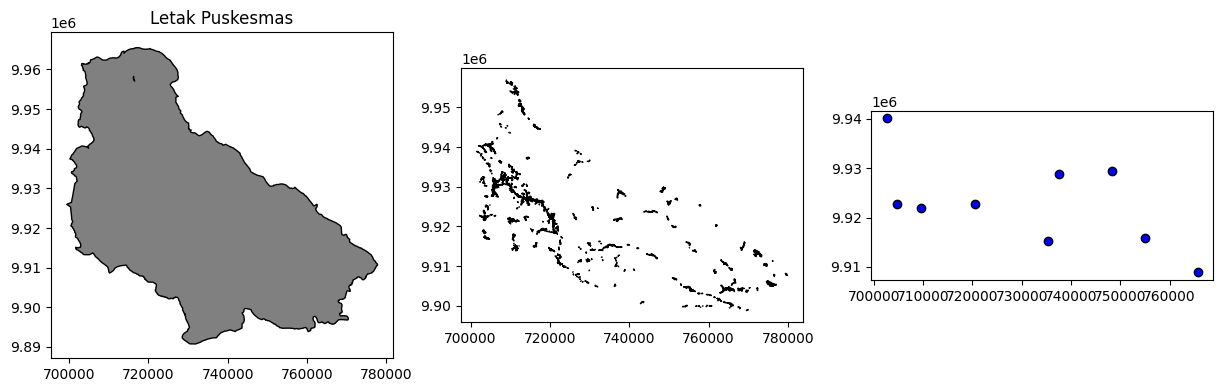

In [ ]:
from fiona.crs import from_epsg

# Change Projection into UTM Zone 47S
SijunjungProject = SijunjungInfo.to_crs(from_epsg(32747))
PemukimanProject = PemukimanInfo.to_crs(from_epsg(32747))
PuskesmasProject = PuskesmasInfo.to_crs(from_epsg(32747))

import matplotlib.pyplot as plt
#Plot all data
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 15))

SijunjungProject.plot(ax=ax1, color ='grey', edgecolor='black')
ax1.set_title('Kabupaten Sijunjung')
PemukimanProject.plot(ax=ax2, color ='green', edgecolor='black')
ax1.set_title('Wilayah Pemukiman')
PuskesmasProject.plot(ax=ax3, color ='blue', edgecolor='black')
ax1.set_title('Letak Puskesmas')

#Show the Plot
plt.show()

In [ ]:
# Extract Latitude and Longitude
Geometry = PuskesmasInfo.geometry
lat = Geometry.y
lon = Geometry.x

# Ubah ke bentuk [lat, long]
Coord = [(lat_val, lon_val) for lat_val, lon_val in zip(lat, lon)]

# Menampilkan hasil
for c in Coord:
    print(c)

(-0.8230719999999678, 101.38722100000007)
(-0.7611141999999518, 101.29195820000007)
(-0.6442223999999328, 101.13388960000003)
(-0.6369711999999481, 101.23148660000004)
(-0.7660028999999327, 101.11449510000006)
(-0.5416785999999547, 100.82118230000003)
(-0.6993411999999353, 100.98085990000004)
(-0.7057122999999592, 100.88431250000008)
(-0.6987563999999793, 100.84047940000005)


In [ ]:
import numpy as np

# Compute the Distance between Puskesmas
# Make a zero matrix to save the distance
Distance = np.zeros((len(Coord), len(Coord)))
for i in range(len(Coord)):
    for j in range(i+1, len(Coord)):
        p1 = np.array(Coord[i])
        p2 = np.array(Coord[j])
        Distance[i, j] = np.linalg.norm(p1 - p2)
        Distance[j, i] = Distance[i, j]

# Convert to meter
# Faktor konversi dari derajat ke meter
ConversFac = 111000  # 1 derajat = 111,000 meter (Estimate)

# Mengalikan nilai jarak dalam derajat dengan faktor konversi
Dist = Distance * ConversFac

# Menampilkan hasil
print(Dist)

[[    0.         12613.90346881 34421.45215673 26935.90851471
  30928.25304397 70165.87849759 47150.65918548 57322.68901293
  62237.32936282]
 [12613.90346881     0.         21821.98322798 15327.76925059
  19705.87700263 57653.99523477 35206.08818673 45664.64820113
  50589.89878531]
 [34421.45215673 21821.98322798     0.         10863.126201
  13687.98641664 36529.13474793 18054.54195764 28531.47779594
  33126.29492988]
 [26935.90851471 15327.76925059 10863.126201       0.
  19333.18921784 46755.94833051 28668.04881193 39284.46578391
  43940.30602962]
 [30928.25304397 19705.87700263 13687.98641664 19333.18921784
      0.         40987.98664525 16576.63346149 26412.16621052
  31318.27097072]
 [70165.87849759 57653.99523477 36529.13474793 46755.94833051
  40987.98664525     0.         24908.17032701 19509.64396738
  17566.71471651]
 [47150.65918548 35206.08818673 18054.54195764 28668.04881193
  16576.63346149 24908.17032701     0.         10740.06962597
  15582.37070696]
 [57322.68901293

In [ ]:
# Compute mean of distance from each puskesmas
MeanDistance = np.mean(Dist, axis=1)

# Show the result
for i in range(len(MeanDistance)):
    print(f"Rata-rata jarak puskesmas {i+1} ke puskesmas lainnya adalah {MeanDistance[i]} meter")

Rata-rata jarak puskesmas 1 ke puskesmas lainnya adalah 37975.11924922648
Rata-rata jarak puskesmas 2 ke puskesmas lainnya adalah 28731.57370643926
Rata-rata jarak puskesmas 3 ke puskesmas lainnya adalah 21892.88860374926
Rata-rata jarak puskesmas 4 ke puskesmas lainnya adalah 25678.75134890255
Rata-rata jarak puskesmas 5 ke puskesmas lainnya adalah 22105.595885450566
Rata-rata jarak puskesmas 6 ke puskesmas lainnya adalah 34897.49694077157
Rata-rata jarak puskesmas 7 ke puskesmas lainnya adalah 21876.286918133603
Rata-rata jarak puskesmas 8 ke puskesmas lainnya adalah 25821.27963049736
Rata-rata jarak puskesmas 9 ke puskesmas lainnya adalah 28809.726842057633


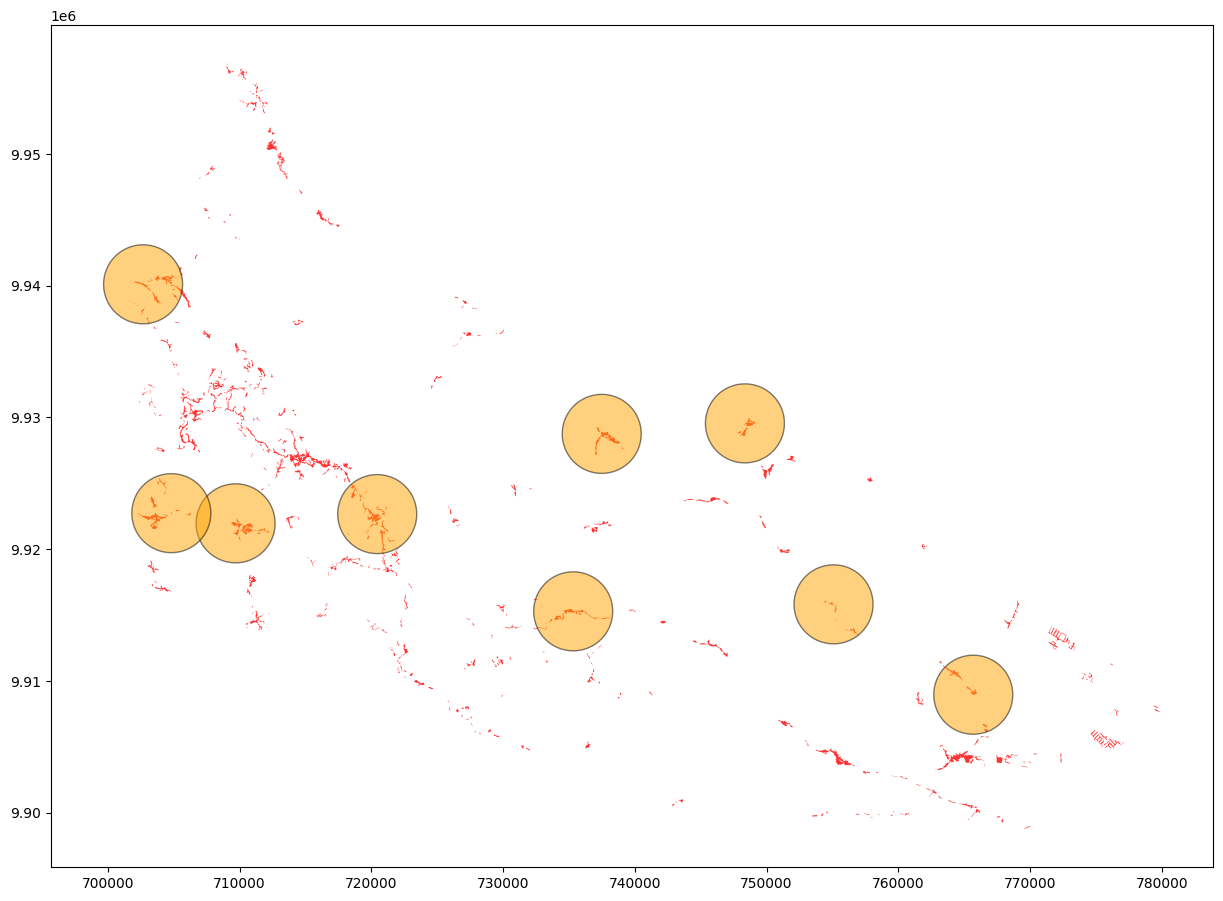

In [ ]:
from geopandas.io.file import to_file
#BUFFER
# Make Buffer Area with 3km distance from Puskesmas
BufferArea = PuskesmasProject.buffer(3000)

#Plot
fig, ax = plt.subplots(figsize=(15, 15))

#Plot Pemukiman
PemukimanProject.plot(ax=ax, color='red', edgecolor='none', alpha=0.8)

#Plot Buffer
BufferArea.plot(ax=ax, color='orange', edgecolor='black', alpha=0.5)

#Show plot
plt.show()

# Save Map
BufferArea.to_file(r'/content/drive/MyDrive/UAS Progspas/AreaBuffer.shp')

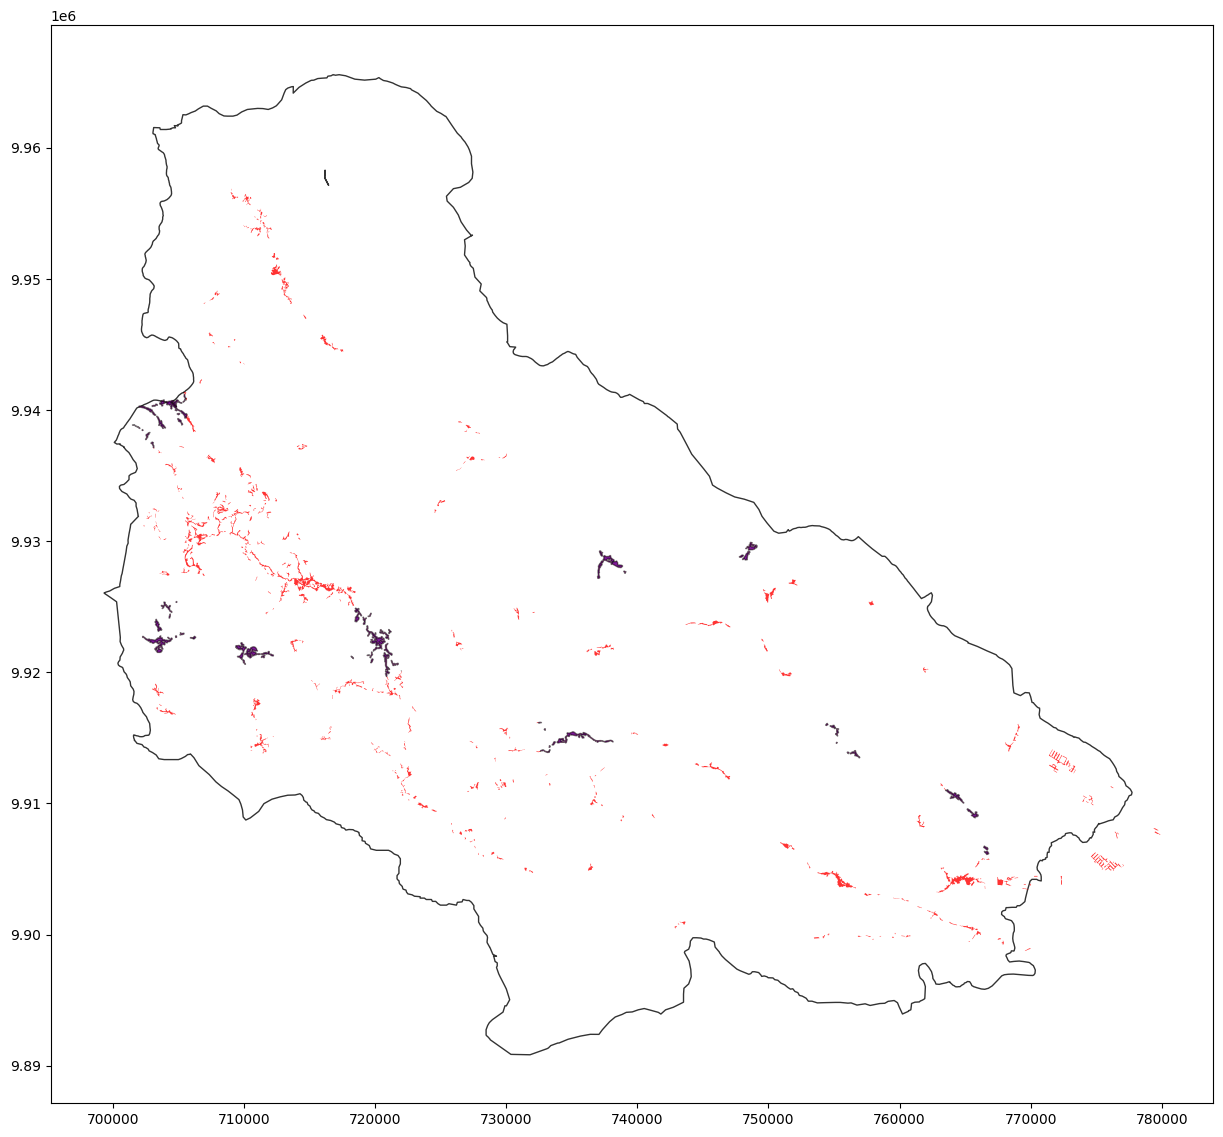

In [ ]:
# INTERSECT
#  Make a Geodataframe from Buffer
BufferData = BufferArea.to_frame().reset_index()

# Do Intersect Project
IntersectProject = gpd.overlay(BufferData, PemukimanProject, how='intersection')

# Plot Intersect
fig, ax = plt.subplots(figsize=(15, 15))

# Plot Kabupaten Sijunjung
SijunjungProject.plot(ax=ax, color='white', edgecolor='black', alpha=0.8)

# Plot Pemukiman
PemukimanProject.plot(ax=ax, color='red', edgecolor='none', alpha=0.8)

# Plot the result of intersect
IntersectProject.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5)

# Menampilkan plot
plt.show()

# Save Map
IntersectProject.to_file(r'/content/drive/MyDrive/UAS Progspas/AreaIntersect.shp')

In [ ]:
# Hitung luas area pemukiman dengan jarak 3 km dari Puskesmas
from pyproj import CRS
crs = CRS.from_epsg(32747)
IntersectArea = IntersectProject.geometry.area.sum()
PersentaseIn= (IntersectArea/PemukimanArea)*100
print('Luas area pemukiman dengan jarak 3 km ke puskesmas:',
      IntersectArea, 'm²')
print('Persentase area dengan jara kurang dari 3 km', PersentaseIn, '%')

# Hitung luas area pemukiman
from pyproj import CRS
crs = CRS.from_epsg(32747)
PemukimanArea = PemukimanProject.geometry.area.sum()
print('Luas Area Pemukiman:', PemukimanArea, 'm²')

#Hitung luas Pemukiman dengan jarak >3km dari puskesmas
NonIntersect = PemukimanArea - IntersectArea
PersentaseNon = (NonIntersect/PemukimanArea)*100
print('Luas area pemukiman dengan jarak lebih dari 3 km ke puskesmas:',
      NonIntersect, 'm²')
print('Persentase area di luar intersect', PersentaseNon, '%')

Luas area pemukiman dengan jarak 3 km ke puskesmas: 5925837.210981366 m²
Persentase area dengan jara kurang dari 3 km 24.064800163893466 %
Luas Area Pemukiman: 24624502.055381373 m²
Luas area pemukiman dengan jarak lebih dari 3 km ke puskesmas: 18698664.844400007 m²
Persentase area di luar intersect 75.93519983610653 %


In [ ]:
import folium
# Get the center of coordinat
center = SijunjungProject.to_crs("EPSG:4326").centroid
lat, lon = center.y, center.x

# Make a blind map
mp = folium.Map(location=[lat, lon], zoom_start=10)

# Make a GeoJson Object using buffer
folium.GeoJson(SijunjungProject, style_function=lambda x: {'fillColor': 'grey',
               'color': 'none', 'fillOpacity': 0.8}).add_to(mp)
folium.GeoJson(PemukimanInfo, style_function=lambda x: {'fillColor': 'red',
               'color': 'none', 'fillOpacity': 0.8}).add_to(mp)
Intersect=IntersectProject.geometry #Mengubah ke dalam format geoseries
folium.GeoJson(Intersect, style_function=lambda x: {'fillColor': 'blue',
              'color': 'none', 'fillOpacity': 0.8}).add_to(mp)

# Show the maps
mp

<ipython-input-67-e9f93b4441bb>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = SijunjungProject.to_crs("EPSG:4326").centroid
